In [1]:
import pandas as pd    
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning)



In [2]:
df_A=pd.read_excel("Data_Science_Case_Study.xlsx",sheet_name="Control Group", ignore_index=True)
df_yedekA=df_A.copy()

In [3]:
df_B=pd.read_excel('Data_Science_Case_Study.xlsx', sheet_name="Test Group", ignore_index=True)
df_yedekB=df_B.copy()

In [4]:
print(df_A.info())
print(df_B.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        31 non-null     object 
 1   Date                 30 non-null     object 
 2   Spend [USD]          30 non-null     float64
 3   # of Impressions     29 non-null     float64
 4   Reach                29 non-null     float64
 5   # of Website Clicks  29 non-null     float64
 6   # of Searches        29 non-null     float64
 7   # of View Content    29 non-null     float64
 8   # of Add to Cart     29 non-null     float64
 9   # of Purchase        29 non-null     float64
dtypes: float64(8), object(2)
memory usage: 2.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        30 non-null

In [5]:
df_A.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,2017.01.01,2436.124529,90572.0,75440.0,4150.0,1657.0,1541.0,566.0,383.0
1,Control Campaign,2017.01.02,2621.043006,129612.0,95667.0,6387.0,2265.0,1563.0,1577.0,644.0
2,Control Campaign,2017.01.03,2427.021083,132803.0,121762.0,6887.0,3100.0,2048.0,1381.0,639.0
3,Control Campaign,2017.01.04,2565.414978,120570.0,104011.0,6478.0,2579.0,2083.0,1650.0,649.0
4,Control Campaign,2017.01.05,2648.683326,95822.0,69059.0,4532.0,1823.0,1220.0,940.0,455.0


In [6]:
df_A=df_A.rename(columns = {"Campaign Name":"camp_name"})
df_A=df_A.rename(columns = {"Date":"date"})
df_A=df_A.rename(columns = {"Spend [USD]":"spend"})
df_A=df_A.rename(columns = {"# of Impressions":"impressions"})
df_A=df_A.rename(columns = {"Reach":"reach"})
df_A=df_A.rename(columns = {"# of Website Clicks":"clicks"})
df_A=df_A.rename(columns = {"# of Searches":"searches"})
df_A=df_A.rename(columns = {"# of View Content":"view_content"})
df_A=df_A.rename(columns = {"# of Add to Cart":"add_cart"})
df_A=df_A.rename(columns = {"# of Purchase":"purchase"})

In [7]:
df_A.head(1)

,camp_name,date,spend,impressions,reach,clicks,searches,view_content,add_cart,purchase
0,Control Campaign,2017.01.01,2436.124529,90572.0,75440.0,4150.0,1657.0,1541.0,566.0,383.0


In [8]:
df_A.isnull().sum()

camp_name       1
date            2
spend           2
impressions     3
reach           3
clicks          3
searches        3
view_content    3
add_cart        3
purchase        3
dtype: int64

In [9]:
df_A.drop([30,31], axis=0, inplace=True)

In [10]:
df_A.fillna(df_A.mean(),inplace=True)


In [11]:
df_A.isnull().sum()

camp_name       0
date            0
spend           0
impressions     0
reach           0
clicks          0
searches        0
view_content    0
add_cart        0
purchase        0
dtype: int64

In [12]:
df_B=df_B.rename(columns = {"Campaign Name":"camp_name"})
df_B=df_B.rename(columns = {"Date":"date"})
df_B=df_B.rename(columns = {"Spend [USD]":"spend"})
df_B=df_B.rename(columns = {"# of Impressions":"impressions"})
df_B=df_B.rename(columns = {"Reach":"reach"})
df_B=df_B.rename(columns = {"# of Website Clicks":"clicks"})
df_B=df_B.rename(columns = {"# of Searches":"searches"})
df_B=df_B.rename(columns = {"# of View Content":"view_content"})
df_B=df_B.rename(columns = {"# of Add to Cart":"add_cart"})
df_B=df_B.rename(columns = {"# of Purchase":"purchase"})

In [13]:
df_B.head()


,camp_name,date,spend,impressions,reach,clicks,searches,view_content,add_cart,purchase
0,Test Campaign,2017.01.01,2335.586267,160244,121551,8223,2989,2949,1371,913
1,Test Campaign,2017.01.02,2899.490621,100793,68241,4972,2162,1388,1253,510
2,Test Campaign,2017.01.03,3031.740149,89525,83450,3514,1365,1251,995,391
3,Test Campaign,2017.01.04,2794.847648,110122,89985,4411,1533,1134,951,434
4,Test Campaign,2017.01.05,2201.845423,122204,84000,5165,1582,1007,810,492


In [58]:
df_A["clickth_rate"]=df_A["clicks"]/(df_A["impressions"]*100)

In [59]:
df_B["clickth_rate"]=df_B["clicks"]/(df_B["impressions"]*100)

In [16]:
df_A["cost_act"]=df_A["spend"]/df_A["purchase"]

In [17]:
df_B["cost_act"]=df_B["spend"]/df_B["purchase"]

In [60]:
df_A["con_rate"]=df_A["purchase"]/(df_A["clicks"]*100)

In [61]:
df_B["con_rate"]=df_B["purchase"]/(df_B["clicks"]*100)

In [20]:
df_Ax=df_A.drop(columns =["camp_name","date","spend","impressions","reach","clicks","searches","view_content","add_cart","clickth_rate","cost_act","clickth_rate","con_rate"],axis=1) 


In [21]:
df_Bx=df_B.drop(columns =["camp_name","date","spend","impressions","reach","clicks","searches","view_content","add_cart","clickth_rate","cost_act","clickth_rate","con_rate"],axis=1) 


In [22]:
print(df_A.head())
print(df_B.head())

          camp_name        date        spend  impressions     reach  clicks  \
0  Control Campaign  2017.01.01  2436.124529      90572.0   75440.0  4150.0   
1  Control Campaign  2017.01.02  2621.043006     129612.0   95667.0  6387.0   
2  Control Campaign  2017.01.03  2427.021083     132803.0  121762.0  6887.0   
3  Control Campaign  2017.01.04  2565.414978     120570.0  104011.0  6478.0   
4  Control Campaign  2017.01.05  2648.683326      95822.0   69059.0  4532.0   

   searches  view_content  add_cart  purchase  clickth_rate  cost_act  \
0    1657.0        1541.0     566.0     383.0      4.581990  6.360638   
1    2265.0        1563.0    1577.0     644.0      4.927784  4.069943   
2    3100.0        2048.0    1381.0     639.0      5.185877  3.798155   
3    2579.0        2083.0    1650.0     649.0      5.372812  3.952874   
4    1823.0        1220.0     940.0     455.0      4.729603  5.821282   

    con_rate  
0   9.228916  
1  10.082981  
2   9.278351  
3  10.018524  
4  10.03971

In [23]:
print(df_A.shape)
print(df_B.shape)

(30, 13)
(30, 13)


In [26]:

df = pd.concat([df_A,df_B])
df.columns = ["camp_name","date","spend","impressions","reach","clicks","searches","view_content","add_cart","purchase","cost_act","clickth_rate","con_rate"]



In [27]:
df.head(25)

,camp_name,date,spend,impressions,reach,clicks,searches,view_content,add_cart,purchase,cost_act,clickth_rate,con_rate
0,Control Campaign,2017.01.01,2436.124529,90572.000000,75440.000000,4150.000000,1657.000000,1541.000000,566.000000,383.00000,4.581990,6.360638,9.228916
1,Control Campaign,2017.01.02,2621.043006,129612.000000,95667.000000,6387.000000,2265.000000,1563.000000,1577.000000,644.00000,4.927784,4.069943,10.082981
2,Control Campaign,2017.01.03,2427.021083,132803.000000,121762.000000,6887.000000,3100.000000,2048.000000,1381.000000,639.00000,5.185877,3.798155,9.278351
3,Control Campaign,2017.01.04,2565.414978,120570.000000,104011.000000,6478.000000,2579.000000,2083.000000,1650.000000,649.00000,5.372812,3.952874,10.018524
4,Control Campaign,2017.01.05,2648.683326,95822.000000,69059.000000,4532.000000,1823.000000,1220.000000,940.000000,455.00000,4.729603,5.821282,10.039718
5,Control Campaign,2017.01.06,2306.081623,118268.000000,83562.000000,6596.000000,2955.000000,1815.000000,1455.000000,734.00000,5.577164,3.141801,11.127956
6,Control Campaign,2017.01.07,2356.996404,144806.000000,105315.000000,8139.000000,3262.000000,2559.000000,1502.000000,799.00000,5.620623,2.949933,9.816931
7,Control Campaign,2017.01.08,2670.222971,97719.000000,74746.000000,5508.000000,2282.000000,1840.000000,837.000000,605.00000,5.636570,4.413592,10.984023
8,Control Campaign,2017.01.09,2720.901584,113781.000000,97334.000000,5901.000000,2109.000000,1955.000000,1959.000000,562.00000,5.186279,4.841462,9.523810
9,Control Campaign,2017.01.10,2441.534142,125097.000000,90192.000000,7646.000000,2914.000000,2200.000000,1433.000000,717.00000,6.112057,3.405208,9.377452


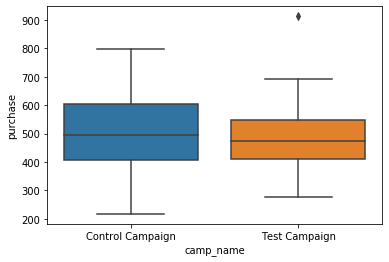

In [66]:
sns.boxplot(x = "camp_name", y = "purchase", data = df);

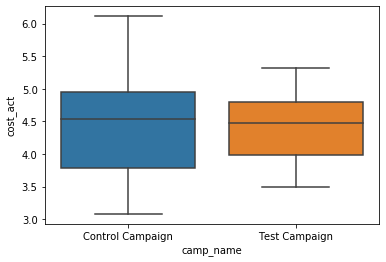

In [65]:
sns.boxplot(x = "camp_name", y = "cost_act", data = df);

In [62]:
df_A.describe().T

,count,mean,std,min,25%,50%,75%,max
spend,30.0,2481.788026,270.352050,1723.719827,2321.526469,2499.630727,2648.653980,3105.836356
impressions,30.0,114608.827586,17806.828121,68766.000000,100785.000000,118211.000000,124067.500000,146702.000000
reach,30.0,87628.482759,15681.261441,49422.000000,76454.500000,87035.241379,96917.250000,121762.000000
clicks,30.0,5150.896552,1407.475788,2244.000000,4280.500000,4984.500000,6312.250000,8139.000000
searches,30.0,2016.758621,610.253517,931.000000,1676.500000,1974.500000,2277.750000,3262.000000
view_content,30.0,1546.310345,457.959877,500.000000,1245.250000,1543.655172,1883.500000,2559.000000
add_cart,30.0,1061.862069,421.877881,303.000000,730.750000,1030.000000,1449.500000,1959.000000
purchase,30.0,507.379310,143.573702,217.000000,408.500000,495.689655,604.500000,799.000000
clickth_rate,30.0,0.000445,0.000080,0.000308,0.000379,0.000453,0.000495,0.000611
cost_act,30.0,5.374692,1.979041,2.858574,4.188759,4.970563,5.852222,11.097485


In [57]:
df_B.describe().T

,count,mean,std,min,25%,50%,75%,max
spend,30.0,2571.426085,298.015635,1974.357447,2344.072941,2641.858788,2807.265544,3091.272267
impressions,30.0,110497.300000,21330.440083,73246.000000,99564.250000,108999.000000,122314.250000,160244.000000
reach,30.0,88826.833333,21373.019568,53002.000000,71442.000000,86525.500000,104221.000000,137273.000000
clicks,30.0,4863.866667,1178.616276,3086.000000,3991.250000,4910.000000,5471.000000,8223.000000
searches,30.0,1862.433333,482.162706,1157.000000,1540.500000,1822.000000,2176.250000,2989.000000
view_content,30.0,1457.600000,484.110959,817.000000,1145.500000,1321.500000,1720.000000,2949.000000
add_cart,30.0,885.333333,270.609317,226.000000,687.500000,880.500000,1062.250000,1371.000000
purchase,30.0,486.066667,125.648643,277.000000,410.000000,472.000000,549.000000,913.000000
clickth_rate,30.0,0.000439,0.000050,0.000350,0.000398,0.000447,0.000479,0.000532
cost_act,30.0,5.653522,1.694793,2.558145,4.579471,5.397461,6.564841,9.899805


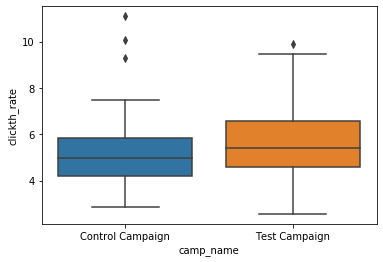

In [63]:
sns.boxplot(x = "camp_name", y = "clickth_rate", data = df);

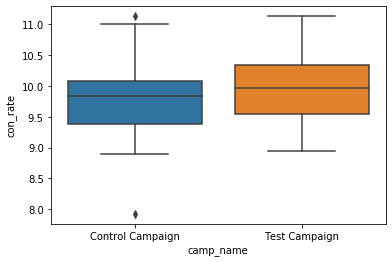

In [64]:
sns.boxplot(x = "camp_name", y = "con_rate", data = df);

In [33]:
print(df_Ax.head())
print(df_Bx.head())

   purchase
0       383
1       644
2       639
3       649
4       455
   purchase
0       913
1       510
2       391
3       434
4       492


In [38]:
df_Ax.purchase = df_Ax.purchase.astype('float')
df_Bx.purchase = df_Bx.purchase.astype('float')
print(df_Bx.info())
print(df_Ax.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   purchase  30 non-null     float64
dtypes: float64(1)
memory usage: 368.0 bytes
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   purchase  30 non-null     float64
dtypes: float64(1)
memory usage: 480.0 bytes
None


In [ ]:
df_Ax["purchase"].mean()

In [40]:
df_Bx["purchase"].mean()

486.06666666666666

In [41]:
print(df_Ax.shape)
print(df_Bx.shape)

(30, 1)
(30, 1)


In [42]:
df_AB = pd.concat([df_Ax, df_Bx], axis = 1)
df_AB.columns = ["A","B"]

df_AB.head()

,A,B
0,383.0,913.0
1,644.0,510.0
2,639.0,391.0
3,649.0,434.0
4,455.0,492.0


In [ ]:
#Normallik varsayimi

H0: Normal dağılım varsayımı sağlanmaktadır.

H1: .. sağlanmamaktadır.

In [314]:
from scipy.stats import shapiro

In [318]:
shapiro(df_AB.A)

(0.9882174134254456, 0.9788618683815002)

In [319]:
shapiro(df_AB.B)

(0.9188652038574219, 0.02506561577320099)

In [ ]:
#homojen varsayimi

H0: Varyanslar Homojendir

H1: Varyanslar Homojen Değildir

In [324]:
from scipy.stats import levene
import scipy.stats as stats

In [325]:
stats.levene(df_AB.A, df_AB.B)

LeveneResult(statistic=1.4573242947259228, pvalue=0.23225655710383264)

In [ ]:
#Hipotez kurulumu

In [ ]:
H0: M1 = M2 (Eski sistem ile yeni sistem arasinda gelir ortalamasi acisindan istatiski olarak anlamli bir fark yoktur.)

H1: M1 != M2 (... vardır)

In [326]:
stats.ttest_ind(df_AB["A"], df_AB["B"], equal_var = True)

Ttest_indResult(statistic=0.6118449178909294, pvalue=0.5430314412386517)

In [328]:
test_istatistigi, pvalue = stats.ttest_ind(df_AB["A"], df_AB["B"], equal_var=True)

print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Test İstatistiği = 0.6118, p-değeri = 0.5430


# ANALIZ

    İstatistiksel bir test, bir süreç veya süreçler hakkında nicel kararlar vermek için bir mekanizma sağlar. Amaç, süreçle ilgili bir varsayımı veya hipotezi "reddetmek" için yeterli kanıt olup olmadığını belirlemektir. 
    BELIRLEDIGIMIZ HIPOTEZIMIZI REDDETMEK ICIN YETERLI KANIT OLUP OLMADIGINI SORGULAYACAGIZ
    
   

   1. HIPOTEZIMIZ:H0: Eski sistem olan 'maximum bidding' ile yeni sistem olan 'average bidding' arasinda satin alma degerleri acisindan istatiksel olarak anlamli bir fark yoktur.
   
   

   2. Test İstatistiği = 0.6118, p-değeri = 0.5430
   
   Istatiksel test sonucunda gruplarimizin birbirine benzerligi 0.5430 olarak olculmustur. (Sonucumuz 0,05 den kucuk bir deger olsaydi gruplarimiz arasinda benzerlik yok kararini verecektik) Bu durumda H0 hipotemiz reddedilemez. 
    H0:Eski sistem olan "maximum bidding" ile yeni sistem olan "average bidding" arasinda satin alma degerleri acisindan istatiksel olarak anlamli bir fark yoktur.
    
    

   3. Gruplarimiz birbirinden bagimsiz olarak olusturulmustur. Ayni kisiler uzerinde tekrar eden bir test olmadigindan dolayi Bagimsiz Iki Orneklem Testi uygulanmistir
   
   

   4. H0: Eski sistem olan "maximum bidding" ile yeni sistem olan "average bidding" arasinda satin alma degerleri acisindan istatiksel olarak anlamli bir fark yoktur. 
   Saglanan bu hipotezimize dayanarak sistem degisikligi sirkete ek bir maliyet olusturacaksa bu maliyete deger bir satis artisi gozlenemediginden dolayi sistem degisikligini tavsiye edemeyiz.
   
   

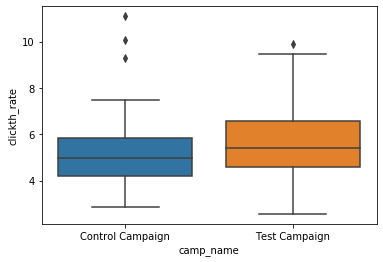

In [67]:
# Reklami goren 100 kisiden kaci icerik icin tiklamistir
# Less than 100 people who saw the ad clicked for the content

sns.boxplot(x = "camp_name", y = "clickth_rate", data = df);


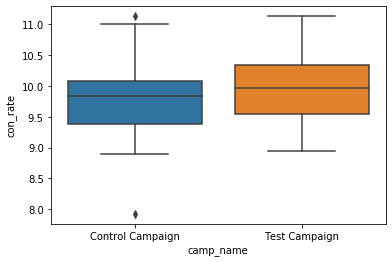

In [68]:
#Her bir satin alma islemi ortalama olarak ne kadar kazandirmistir
# How much, on average, each purchase has earned
sns.boxplot(x = "camp_name", y = "con_rate", data = df);

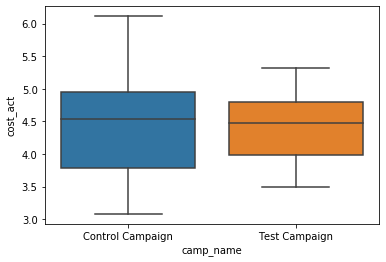

In [69]:
# Web sitesine tiklayan 100 kisiden kaci satin alma islemini gerceklestirmistir 

# Less than 100 people who clicked on the website have made the purchase
sns.boxplot(x = "camp_name", y = "cost_act", data = df);